# Author - Saurabh Shinde

# Task 6 - Prediction using Decision Tree Algorithm

# GRIP @ The Spark Foundation¶

## Create the Decision Tree classifier and visualize it graphically

## The purpose is if we feed any new data to this classifier, it would be able to predict the right class accordingly. 


## Dataset : https://bit.ly/3kXTdox

Here i import some libraries which required for execution

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as pt

In [2]:
df=pd.read_csv('iris.csv')
df.head()                       # here we can see first five rows form given dataset using head method

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
df.shape          # here we can see the number of rows and columns in dataset using shape function

(150, 6)

In [4]:
df.info()     # here i use info method for analyze the feature of dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
df.isnull().sum()       # here i am check having any null values in data set or not

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [6]:
df.describe()       # describe function gives statistical info about dataset

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [7]:
df.corr()        # this function defines the relation between the columns

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


<AxesSubplot:>

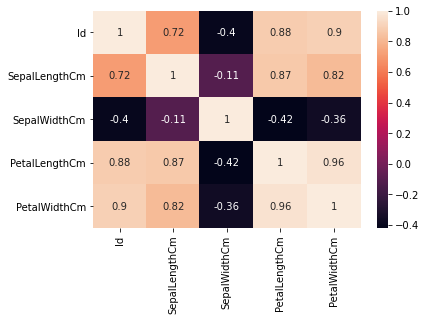

In [8]:
sns.heatmap(df.corr(),annot=True)      # here we just visulize the relation of columns in graph format

In [9]:
df.columns           # here i display columns of dataset

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [10]:
df=df.drop(columns=['Id'])  # Here i drop id column which is not needed in model building

In [11]:
count= df['Species'].value_counts()
count                               # Here using value counts we can see the values of categorical values.      

Iris-virginica     50
Iris-setosa        50
Iris-versicolor    50
Name: Species, dtype: int64

In [12]:
df['Species']=df['Species'].map({'Iris-versicolor':0,'Iris-setosa':1,'Iris-virginica':2})
# Here i am doing label encoding using map function we can use label encoding library also.

In [13]:
df.head() # here we can see first five rows form given dataset using head method

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1


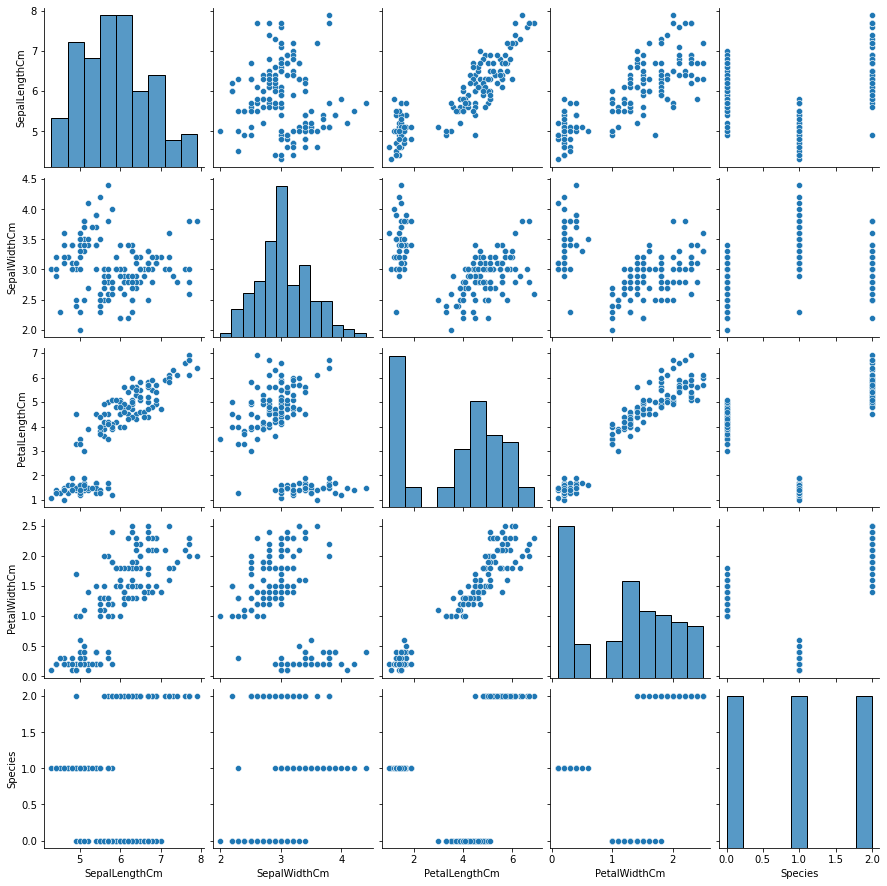

In [14]:
sns.pairplot(df)  # here we can see all the dataset in graphical form

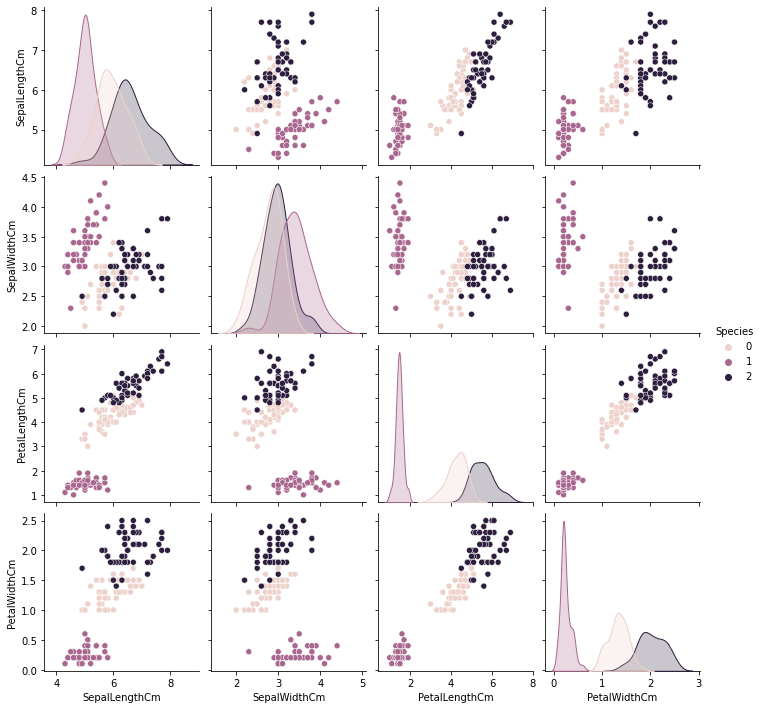

In [15]:
sns.pairplot(df,hue='Species') #here i plot pairplot for target columns for visulize the representation of target column

## Here i split the data in depdendent and independent variabel

In [16]:
x=df.drop(columns=['Species'])
y=df['Species']

In [17]:
## Here i am used elasticnetcv method for overcome the overfitting issue

In [18]:
from sklearn.linear_model import ElasticNet
en=ElasticNet( random_state=0)

In [19]:
en.fit(x,y)

ElasticNet(random_state=0)

In [20]:
x.shape

(150, 4)

In [21]:
y.shape

(150,)

## Here i import libraries for train the model and machine learning algortihm to make the model

In [22]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

## Here i am spliting the data into trainig and testing in which testing having 20 % and training having 80 % of data

In [23]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.2)

In [24]:
xtrain.shape

(120, 4)

In [25]:
xtest.shape

(30, 4)

In [26]:
ytrain.shape

(120,)

In [27]:
ytest.shape

(30,)

## here i am create the object for machine learning algorithm

In [28]:
model=DecisionTreeClassifier(min_samples_split=3,random_state=0)

In [29]:
#help(DecisionTreeClassifier)

## Here i am fit the model

In [30]:
model.fit(xtrain,ytrain)

DecisionTreeClassifier(min_samples_split=3, random_state=0)

## In ypred i am stored the predicted values

In [31]:
ypred=model.predict(xtest)

In [32]:
ypred

array([0, 0, 0, 2, 1, 0, 1, 2, 0, 0, 0, 0, 0, 0, 1, 1, 0, 2, 2, 0, 1, 1,
       0, 0, 0, 0, 2, 1, 2, 2], dtype=int64)

## Here i am compare the actual and predicted values

In [33]:
prediction = pd.DataFrame({'Actual':ytest,'predicted':ypred})
print(prediction)

     Actual  predicted
86        0          0
91        0          0
69        0          0
125       2          2
35        1          1
62        0          0
33        1          1
128       2          2
63        0          0
50        0          0
94        0          0
66        0          0
76        0          0
90        0          0
28        1          1
20        1          1
79        0          0
101       2          2
132       2          2
93        0          0
48        1          1
31        1          1
54        0          0
97        0          0
61        0          0
87        0          0
140       2          2
5         1          1
127       2          2
145       2          2


## here i am call metrics library for checking the accuracy and statistical information for performance of the model

In [34]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [35]:
print(model.score(xtrain,ytrain))

1.0


In [36]:
print(model.score(xtest,ytest))

1.0


In [37]:
accuracy = accuracy_score(ytest,ypred)
print(accuracy)

1.0


## By using tunnig method we can get best parameter for our model to increase the performance of model.

In [38]:
# model Tuning 
model = DecisionTreeClassifier(random_state=1)

#parameters

criterion = ["gini", "entropy"]
splitter = ['best','random']
max_depth= [15]
max_features = ["auto", "sqrt", "log2"]


# make grid search cv

grid = {'criterion':criterion,'splitter':splitter,'max_depth':max_depth,'max_features':max_features}


from sklearn.model_selection import RepeatedStratifiedKFold

cv = RepeatedStratifiedKFold(n_repeats=3,n_splits=3,random_state=2)


from sklearn.model_selection import GridSearchCV
    
grid_cv= GridSearchCV(estimator=model,cv=cv,param_grid=grid,n_jobs=1,scoring='accuracy')   

res=grid_cv.fit(xtrain,ytrain)

## Here i got the best parameter for our model

In [39]:
print('The best parameters for the model is',res.best_params_)

The best parameters for the model is {'criterion': 'gini', 'max_depth': 15, 'max_features': 'auto', 'splitter': 'random'}


## Here i got the model score 

In [40]:
print('The model score is: ',res.best_score_)


The model score is:  0.9416666666666667


## Based on tunnig method we predict new values.

In [41]:
new_ypred=res.predict(xtest)

In [42]:
print(new_ypred)

[0 0 0 2 1 0 1 2 0 2 0 0 0 0 1 1 0 2 2 0 1 1 0 0 0 0 2 1 2 2]


## Here i am compare the actual values and predicted values which are predicted by the tunning method

In [43]:
tuning_prediction = pd.DataFrame({'actual':ytest,'tunnig_prediction':new_ypred})
tuning_prediction

,actual,tunnig_prediction
86,0,0
91,0,0
69,0,0
125,2,2
35,1,1
62,0,0
33,1,1
128,2,2
63,0,0
50,0,2


In [44]:
classification_report = classification_report(ytest,new_ypred)

In [45]:
accuracy = accuracy_score(new_ypred,ytest)
accuracy

0.9666666666666667

In [46]:
print(classification_report)

              precision    recall  f1-score   support

           0       1.00      0.94      0.97        16
           1       1.00      1.00      1.00         7
           2       0.88      1.00      0.93         7

    accuracy                           0.97        30
   macro avg       0.96      0.98      0.97        30
weighted avg       0.97      0.97      0.97        30



## here i am plot heatmap for analysing the performance of the model

AxesSubplot(0.125,0.125;0.62x0.755)


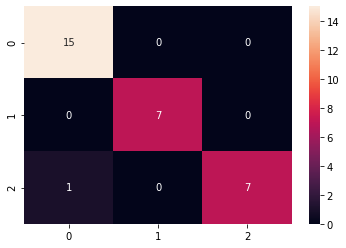

In [47]:
print(sns.heatmap(confusion_matrix(new_ypred,ytest),annot=True))

In [48]:
SepalLengthCm = float(input('enter the value of SepalLengthCm'))
SepalWidthCm = float(input('enter the value of SepalWidthCm'))
PetalLengthCm = float(input('enter the value of PetalLengthCm'))
PetalWidthCm = float(input('enter the value of PetalWidthCm'))
data = [[SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm]]
input_val = res.predict(data)
print()
if input_val==0:
    print('The Species is : Iris-versicolor')
elif input_val==1:
    print('The Species is : Iris-setosa ')
else:
    print('The species is : Iris-virginica')

enter the value of SepalLengthCm4.9
enter the value of SepalWidthCm3.0
enter the value of PetalLengthCm1.4
enter the value of PetalWidthCm0.2

The Species is : Iris-setosa 


In [49]:
from sklearn.tree import plot_tree

In [50]:
import graphviz
from sklearn import tree

## Here i am visulize the model using plot tree method

[Text(418.5, 298.98, 'X[3] <= 0.8\ngini = 0.663\nsamples = 120\nvalue = [34, 43, 43]'),
 Text(354.11538461538464, 244.62, 'gini = 0.0\nsamples = 43\nvalue = [0, 43, 0]'),
 Text(482.8846153846154, 244.62, 'X[3] <= 1.75\ngini = 0.493\nsamples = 77\nvalue = [34, 0, 43]'),
 Text(257.53846153846155, 190.26000000000002, 'X[2] <= 4.95\ngini = 0.229\nsamples = 38\nvalue = [33, 0, 5]'),
 Text(128.76923076923077, 135.9, 'X[3] <= 1.65\ngini = 0.061\nsamples = 32\nvalue = [31, 0, 1]'),
 Text(64.38461538461539, 81.53999999999999, 'gini = 0.0\nsamples = 31\nvalue = [31, 0, 0]'),
 Text(193.15384615384616, 81.53999999999999, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(386.3076923076923, 135.9, 'X[3] <= 1.55\ngini = 0.444\nsamples = 6\nvalue = [2, 0, 4]'),
 Text(321.9230769230769, 81.53999999999999, 'gini = 0.0\nsamples = 3\nvalue = [0, 0, 3]'),
 Text(450.69230769230774, 81.53999999999999, 'X[0] <= 6.95\ngini = 0.444\nsamples = 3\nvalue = [2, 0, 1]'),
 Text(386.3076923076923, 27.18000000000000

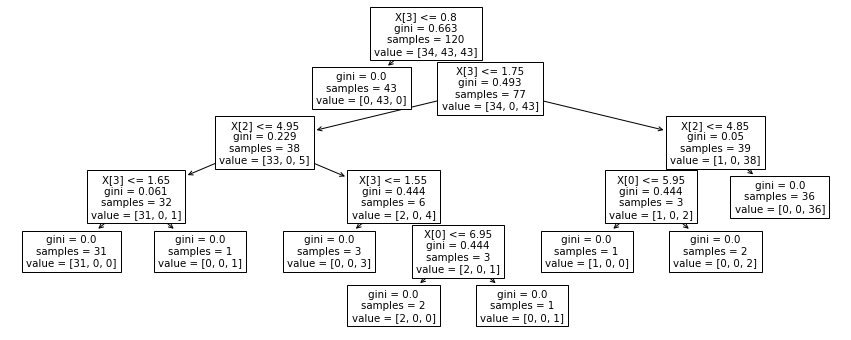

In [51]:
plt.figure(figsize=(15,6))
model=model.fit(xtrain,ytrain)
plot_tree(model)

# Conclusion

## Here i am build Decision Tree Classifier model using Iris dataset and get 100 percent accuracy but the model is overfitted for overcome this problem i am tune the model using hypertuning method after that model gives 94 percent accuracy and i am visualize the tree classifier using the Sklearn.tree method.